<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-parte" data-toc-modified-id="1-parte-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1 parte</a></span></li></ul></div>

# 1 parte

**Obiettivo**: è possibile prevedere se un paziente dovrebbe essere curato o meno per la sua malattia mentale in base ai valori ottenuti nel set di dati attraverso una classificazione binaria?

Il set di dati proviene da un sondaggio che misura gli atteggiamenti nei confronti della salute mentale e la frequenza dei disturbi di salute mentale nei luoghi di lavoro in compagnie *tech*.

Fonte: https://osmhhelp.org/research (anno 2014)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#importo le librerie per il decision tree classifier e per il controllo dell'accuratezza
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
import scikitplot as skplt 
import seaborn as sns

#os.listdir()

In [2]:
data=pd.read_csv('dataset_wsh4.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [3]:
data.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yes    637
No     622
Name: treatment, dtype: int64

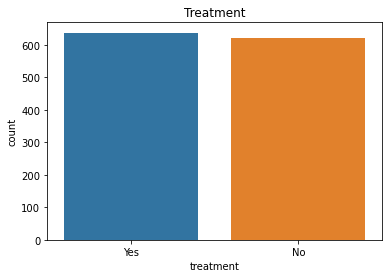

In [9]:
sns.countplot(data['treatment'])
plt.title("Treatment")

data.treatment.value_counts()

In [10]:
data.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [13]:
#cleaning per la X
#Riconduzione a 3 diversi tipi di sesso

sesso = {'Male':'M','male':'M','Female':'F','M':'M','female':'F','F':'F','m':'M',
'f':'F',                                                  
'Make':'M',                                               
'Male':'M',                                               
'Woman':'F',                                              
'Cis Male':'M',                                           
'Man':'M',                                                
'Female (trans)':'F',                                    
'Female':'F',                                            
'Trans woman':'F',                                        
'msle':'M',                                               
'male leaning androgynous':'M',                           
'Neuter':'O',                                             
'cis male':'M',                                           
'queer':'O',                                              
'Female (cis)':'F',                                       
'Mail':'M',                                               
'cis-female/femme':'F',                                   
'A little about you':'O',                                
'Malr':'M',                                              
'p':'O',                                                  
'femail':'F',                                             
'Cis Man':'M',                                            
'Guy (-ish) ^_^':'M',                                     
'Enby':'O',                                               
'Agender':'O',                                            
'Androgyne':'O',                                          
'Male-ish':'M',                                           
'maile':'M',                                              
'Trans-female':'F',                                      
'Cis Female':'F',                                         
'something kinda male?':'M',                             
'Mal':'M',                                                
'Male (CIS)':'M',                                       
'queer/she/they':'F',                                     
'non-binary':'O',                                         
'Femake':'F',                                             
'woman':'F',                                              
'Nah':'O',                                                
'All':'O',                                                
'fluid':'O',                                              
'Genderqueer':'O',                                        
'ostensibly male, unsure what that really means':'M'}     

data['sesso'] = data['Gender'].map(sesso)
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,sesso
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,F
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,M
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,M
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,M
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,M
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,M
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Yes,Yes,No,No,No,No,No,No,NaN,M
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Yes,No,No,No,No,No,No,No,NaN,F


C:\Users\Aragon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


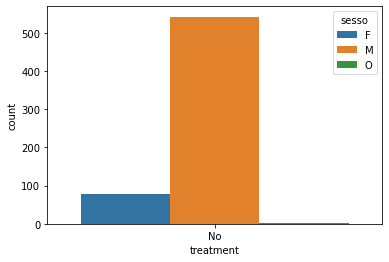

In [14]:
sns.countplot(data.treatment,hue=data.sesso,order=data['treatment'].value_counts().iloc[1:2].index)
plt.show()

In [23]:
#encoding
label='treatment'

# labels
y = data[label].values

y = OneHotEncoder(sparse=False, drop='if_binary').fit_transform(y.reshape(-1, 1)).squeeze()

# oppure con pandas
# y = pd.get_dummies(y, drop_first=True).values.squeeze()

y.shape
y

array([1., 0., 0., ..., 1., 0., 1.])

In [20]:

X=data[['Country','self_employed','family_history','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence','sesso']]
X.shape

#encoding categorical

ohe = OneHotEncoder(sparse=False, drop='if_binary')
X = ohe.fit_transform(X.values)

# oppure con pandas
# X_cat = pd.get_dummies(X_cat, columns=categorical).values

print(X.shape)


(1259, 106)


In [21]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [54]:
#separazione tra train e test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#controllo che le dimensioni siano omogenee
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1007, 106), (252, 106), (1007,), (252,))

In [58]:
model_dt = DecisionTreeClassifier(criterion='gini',max_depth=5)
model_dt.fit(X_train, y_train)
p_test_dt = model_dt.predict(X_test)
errori_DT = accuracy_score(y_test, p_test_dt) 
print(errori_DT)


0.6944444444444444


In [59]:
#visualizzo un report di classificazione che da informazioni in più oltre all'accuratezza
from sklearn.metrics import classification_report, confusion_matrix

#decision tree

print("Report Decision Tree")
#print(confusion_matrix(y_test, p_test_dt))
print(classification_report(y_test, p_test_dt))

#precision :Percentuale dei documenti selezionati che sono  rilevanti (tp/tp+fp)
#recall:Percentuale dei documenti rilevanti che sono  stati selezionati (tp/tp+fn)
#f1-score:

Report Decision Tree
              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68       129
         1.0       0.67      0.75      0.70       123

    accuracy                           0.69       252
   macro avg       0.70      0.70      0.69       252
weighted avg       0.70      0.69      0.69       252



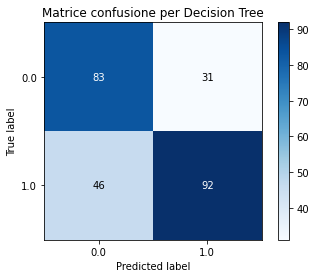

In [60]:
#grafico le matrici di confusione per i due modelli per verificare quale dei due sia il migliore


#print('Matrice confusione per Decision Tree')
skplt.metrics.plot_confusion_matrix(p_test_dt,y_test, title='Matrice confusione per Decision Tree')
plt.show()



**Domande teoriche:**



-------------------------------------------------------------------------------------------------------

**1.** Se dovessi creare un modello di classificazione binaria a partire da un dataset avente tale distribuzione delle classi, l'accuratezza potrebbe essere una buona metrica per valutare il tuo modello? Motiva la tua riposta.

![distro](distro.png)




**2.** La scalatura delle features influenza la costruzione di un albero decisionale? Motiva la tua risposta.



--------------------------------------------------------------------------------------------------------------------------------------




**1.** Vedendo la distribuzione delle features e la numerosità, l'accuratezza non potrebbe essere una buona metrica poichè è visibile una netta disomogeneità tra le due classi, e l'accuratezza sarebbe calcolata sulla totalità dei samples e non con riferimento alle specifici classi.


**2.** La scalatura influenza considerevolmente tutti i modelli che implicano il calcolo di una distanza all'interno dello spazio in cui sono suddivisi. l'albero decisionale si basa sulla scelta dello split decisionale con criterio lo split a entropia minore, entropia che dipende dalla probabilità e non dalla suddivisione di samples all'interno dello spazio. il KNN, invece, basando il calcolo predittivo proprio sulla distanza euclidea, è fortemente influenzato dallo scaling, per normalizzare tutte le variabili e non creare dei falsi negativi o falsi positivi.